# Symptoms distribution distance

*The key insight governing this metric is to compare two diagnostic based on the distance between their symptom distribution*

To achieve this goal, we need a way to build a distance between two probability distribution. Let call this distance $d_S(P, Q)$. Once provided this distance, the key idea is to compare to diagnostic based on their symptom distribution aka.

$$
    d(D_1, D_2) = d_S(S | D_1, S | D_2)
$$

For more information on how to evaluate the feasability and soundness of this metric, we will be using this distance to build a tree of diagnostic to then compare this tree. If the metric is good enought, it should be hard to distinguish between two diagnostic that are close in the final tree. This tree will then be handed over to qualified personal to give feedback feedback and evaluation.

### Additional Consideration

All probability distribution won't be trainned on real data but on generated one. This may have a negative impact on the quality of the final tree and therefore badly impact the evaluation of this metric.

## Jensen Shannon Distance

The **Kullback–Leibler divergence** (also called **relative entropy**) denoted $D_{KL}(P || Q)$, is a type of statistical quantifying the dissimilarity between two probability distribution $P$ and $Q$. A simple interpretation of the *KL-divergence* of $P$ from $Q$ is the expected excess surprise from using $Q$ as a model when the actual distribution is $P$.

$$
    D_{KL}(P || Q) = \sum_{x \in \mathcal{X}} P(x) \log \left( \frac{P(x)}{Q(x)} \right)
$$

However, due to its non-symmetrical nature, it may introduce bias when comparing two similar distributions. To address this, a symmetric notion of distance is sought.

> To meet this requirement, we consider using $D_{KL}(P||Q)+D_{KL}(P||Q)$. This leads us to a related concept of distance known as the 
> **Jensen–Shannon divergence**.

The **Jensen–Shannon divergence** is a measure of similarity between two probability distributions. Also known as the information radius, it builds upon the *Kullback–Leibler divergence* with key distinctions, including symmetry and a guaranteed finite value. The square root of this divergence is commonly referred to as the **Jensen–Shannon distance**.

$$
  JSD(P || Q) = \frac{1}{2} D_{KL} (P || M) + \frac{1}{2} D_{KL}(Q || M)
$$

where $M$ is a mixture distribution of $P$ and $Q$.

### Mixture Distribution $M$

Let's explore ways to define the mixture distribution MM in an intuitive and useful manner.



1. **Naive Approach**:
    The most straightforward method is to assume that the distance should not favor one distribution over the other. In mathematical terms:

    $$
      M = \frac{1}{2} P + \frac{1}{2} Q
    $$

    However, a drawback of this approach is that it doesn't penalize the model for predicting a very rare condition $C_1$​ over a more frequent $C_0$​ if $C_1$​ and $C_0$​ exhibit similar symptoms.

2. **Weighted Approach**:
    A more nuanced approach involves weighing each distribution $P$ and $Q$ based on their relative probabilities:

    $$
      M = \frac{p(P)}{p(P) + p(Q)} P + \frac{p(Q)}{p(P) + p(Q)} Q
    $$
      
    This approach addresses the limitation of the naive method by considering the relative likelihoods of the distributions, ensuring that their contribution to the mixture aligns with their probabilities.

    **Pros**:
    - **Symmetry**: *Jensen–Shannon divergence* is symmetric, providing a fair comparison between distributions.
    - **Finite-Value**: *Jensen–Shannon divergence* always produces a finite value, making it more robust in certain scenarios.
    - **Balancing Rare and frequent condition**: Addresses the issue of not penalizing the model for predicting a rare condition over a more frequent one.

    **Cons**:
    - **Sensitivity**: Performance may be sensitive to the quality of probability estimates, especially in the weighted approach.
    - **Vanishing Diagnostic**: The weighted approach may lead to a "vanishing diagnostic" issue. If one distribution has an extremely low probability ($p(P)$ or $p(Q)$ close to zero), the corresponding term in the weighted mixture could become negligible. This could result in the underrepresentation of a condition in the mixture, especially if the model heavily relies on the weighted terms.

3. **Rectified Weighted Approach**:
    To address the potential issue of vanishing diagnostics in the weighted approach, a rectified weighted approach can be introduced. This modification incorporates a smoothing function $f$ to mitigate the risk of completely neglecting conditions with very low probabilities. The rectified mixture distribution ($M_{\text{rectified​}}$) is defined as follows:

    $$
        M_{\text{rectified​}} = f \left( \frac{p(P)}{p(P) + p(Q)} \right) \cdot P + f \left( \frac{p(Q)}{p(P) + p(Q)} \right) \cdot Q 
    $$

    **Pros**:
    - **Enhanced Robustness**: Enhanced robustness against extreme probability values.
    - **Tuning Smoothing Parameters**: Flexibility in adjusting the smoothing behavior.

    **Cons**:
    - **Complexity of Added Parameter**: Introduces complexity through the addition of tunable parameters.

### Sigmoid Smoothing function $f$

To implement the rectified weighted approach, a tunable smoothing function $f$ is introduced to prevent the vanishing diagnostic issue. One illustrative choice for $f$ is the sigmoid function, denoted as $\sigma(x)$. The sigmoid function is characterized by its S-shaped curve, mapping any real number to the range $(0, 1)$. This makes it a suitable candidate for introducing smoothness and controlling the contributions of each distribution in the rectified mixture.

The sigmoid smoothing function $\sigma(x,\alpha)$ is defined as follows

$$
    \sigma(x, \alpha) = \frac{1}{1 + e^{-\alpha x}}
$$

In this context, $\alpha$ serves as a customizable parameter influencing the smoothness of the sigmoid function. A higher value of $\alpha$ causes the metric to resemble the naive metric, approaching identical behavior as $\alpha$ tends to infinity. Conversely, a lower value of $\alpha$ renders the metric more susceptible to the vanishing diagnostic issue, but it places a greater emphasis on the probability distribution of the diagnostics.

*After this not-at-all overengineered distribution distance, let describe how to approximate $S | D; G$ in pratice*

<!-- 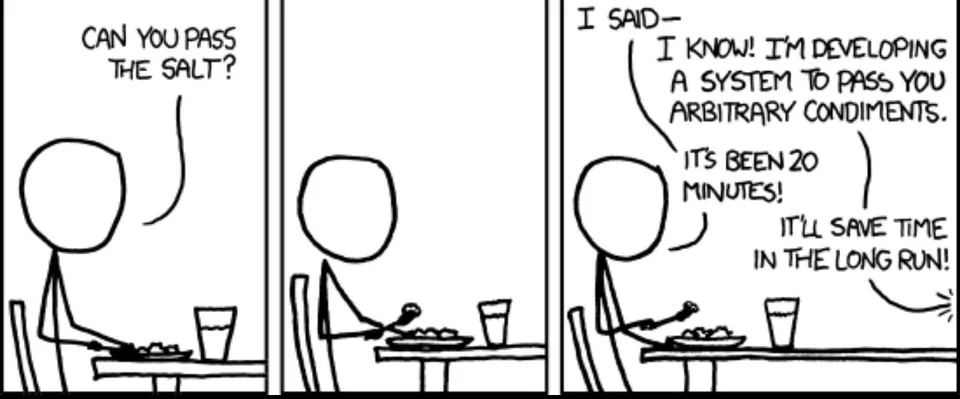 -->
![1 _uLYD-N9sgT7KnZMRGcPNA.png](<attachment:1 _uLYD-N9sgT7KnZMRGcPNA.png>)
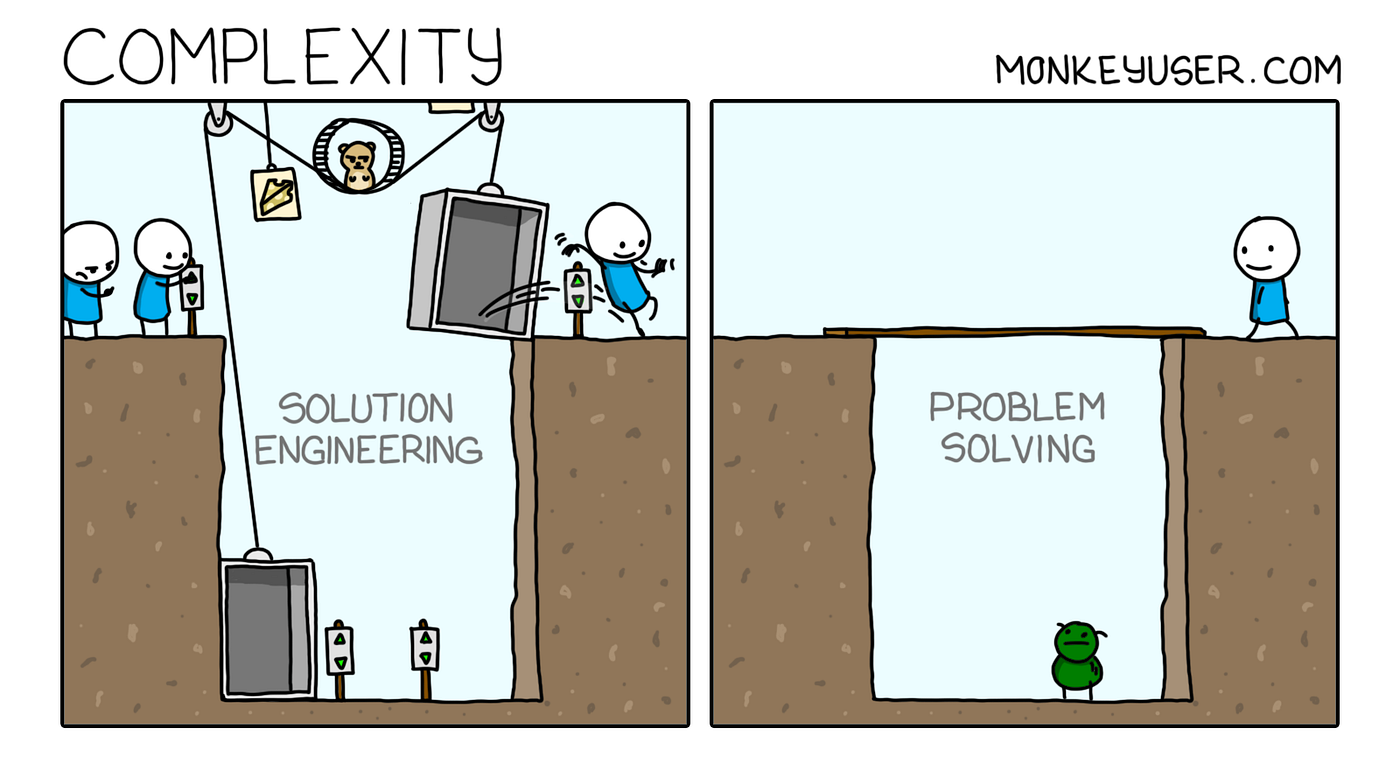

## Symptoms distribution approximation

*The fundamental principle guiding this metric is to compare two diagnostics based on the distance between their symptom distributions.*

In the context of computing the probability $S | D_i$, it is essential to consider the potential dependency on a guideline $G$. The construction of $S | D_i; G$ involves the integration of guideline information to enhance the accuracy of symptom probability estimates.

One approach to achieve this is through the utilization of a neural network, such as a Large Language Model. This LLM takes a structured guideline as input, as well as the name of a disease and should return the probability distribution $S | D; G$

## Embedding

1. Use patient description embedding in a large language model (or a distilled one)
2. Clustering of the embedding (+ PCA ?)
3. Use MDN (Mixture Density Model)

### Is Overfitting a Concern ?

The consideration of overfitting in the context of the LLM raises various points that impact its relevance:

**Pros**:
  - *Better Probability Encapsulation*: Overfitting may enable the LLM to encapsulate more nuanced probabilities, allowing it to closely align with the intricacies and specificities present in the guideline data.

**Cons**:
  - *Struggle to Generalize to New Guidelines*: Overfitting could pose challenges when attempting to generalize the LLM to new guidelines. The model might become too tailored to the specifics of a particular guideline, limiting its adaptability.

  - *Consistency Across Guideline Variations*: Symptoms are expected to correspond more or less to the same diagnosis across various guidelines. Overfitting may result in a model that is overly sensitive to small variations in guidelines, impacting the consistency of symptom-diagnosis associations.

  - *Limited Generalization Across Geographic Regions*: Guidelines, often defined by geographic regions, may provide only a partial and refined local view of symptoms. Overfitting might hinder the LLM's ability to generalize symptom distribution estimates across diverse geographic regions.

### Building the LLM estimator model

# Wikipedia Distance

*The key insight behind this metric is that two diagnostic are close if their description is closed*

> We can retrieve the description from webscrapping wikidoc / wikipedia / wikidata

### Method n°1

Retrieve information about the disease on Wikipedia, wikidoc then measure the cosine similarity between the embedding of both descriptions. 

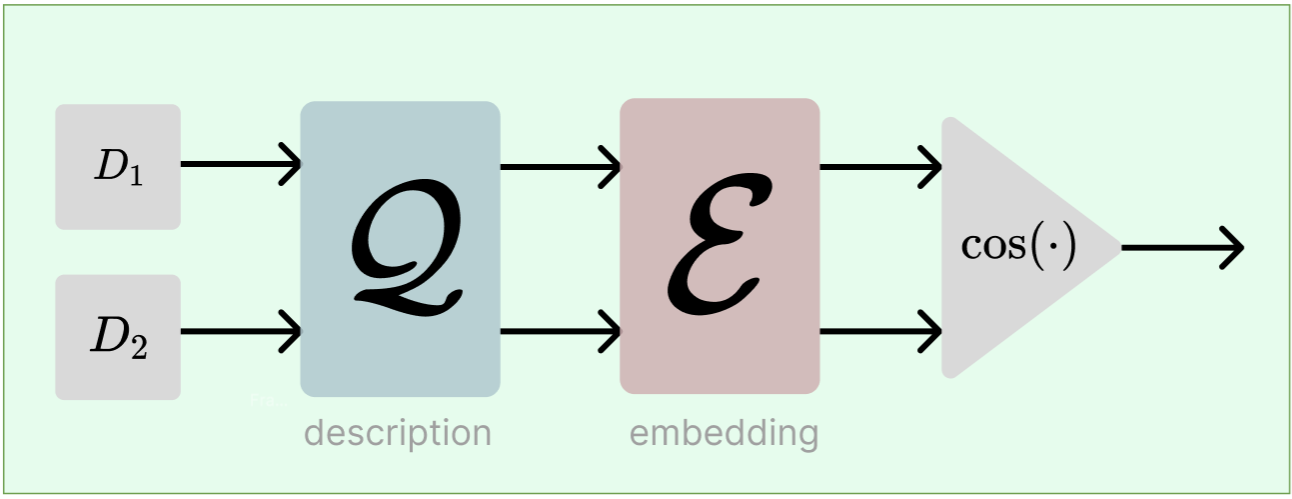

## Method 2

1. For each diagnostic, establish a definition using wikipedia/wikidata/wikidoc/wikiwhatever

2. Extract a list of entity with relation to the list (this can be done by using a TF-IDF matrix)

3. Clustering / Classification of documents

4. Build a classification tree

In [1]:
import numpy as np
import requests